In [1]:
# Initial imports
import numpy as np
import pandas as pd
from stockstats import StockDataFrame as sdf
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
import lib_copy
%matplotlib inline

In [2]:
load_dotenv()

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8


True

In [3]:


df = lib_copy.fetch_ohlcv("JPM", "2018-01-12", "2019-06-12")

In [4]:
def adding_boll_kelt_ewma_dataframe(dataframe):
    lib_copy.bollinger_band_generator(dataframe)
    lib_copy.keltner_channel(dataframe)
    lib_copy.ewma(dataframe)

    return dataframe

In [5]:
everything = adding_boll_kelt_ewma_dataframe(df)

In [6]:
# Looking for missing values
everything.isnull().sum().sum()

61

In [7]:
# Filling missing values with the previous ones
everything = df.dropna()
everything

,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,close_-1_s,tr,tr_14_smma,atr,kcmid,kcup,kclo,EMA9,EMA21
2018-01-16 11:30:00-05:00,112.47,112.650,112.420,112.440,25708,112.27150,0.377122,113.025745,111.517255,112.480,0.230,0.455827,0.455827,112.27150,112.727327,111.815673,112.407866,112.305010
2018-01-16 11:45:00-05:00,112.42,112.500,112.250,112.470,20077,112.29500,0.373944,113.042888,111.547112,112.440,0.250,0.436804,0.436804,112.29500,112.731804,111.858196,112.420293,112.320009
2018-01-16 12:00:00-05:00,112.46,112.480,112.270,112.390,24848,112.31600,0.366450,113.048901,111.583099,112.470,0.210,0.416273,0.416273,112.31600,112.732273,111.899727,112.414235,112.326371
2018-01-16 12:15:00-05:00,112.40,112.400,112.010,112.040,36098,112.31750,0.365191,113.047882,111.587118,112.390,0.390,0.413940,0.413940,112.31750,112.731440,111.903560,112.339388,112.300338
2018-01-16 12:30:00-05:00,112.06,112.080,111.870,111.905,33095,112.30875,0.373190,113.055130,111.562370,112.040,0.210,0.396134,0.396134,112.30875,112.704884,111.912616,112.252510,112.264398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-11 14:45:00-04:00,110.52,110.560,110.430,110.530,14003,110.81880,0.324757,111.468314,110.169286,110.520,0.130,0.243855,0.243855,110.81880,111.062655,110.574945,110.663712,110.731610
2019-06-11 15:00:00-04:00,110.48,110.630,110.410,110.580,15131,110.76930,0.276024,111.321348,110.217252,110.530,0.220,0.242151,0.242151,110.76930,111.011451,110.527149,110.646970,110.717827
2019-06-11 15:15:00-04:00,110.58,110.735,110.550,110.720,16345,110.74130,0.248525,111.238351,110.244249,110.580,0.185,0.238069,0.238069,110.74130,110.979369,110.503231,110.661576,110.718025
2019-06-11 15:30:00-04:00,110.72,110.885,110.685,110.805,28276,110.73655,0.246230,111.229010,110.244090,110.720,0.200,0.235349,0.235349,110.73655,110.971899,110.501201,110.690261,110.725932


In [8]:
response_data = lib_copy.signals_generator(everything)

response_data.index = response_data.index.date
final_df = response_data
final_df

,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,close_-1_s,...,kcmid,kcup,kclo,EMA9,EMA21,squeeze,crossup,crossdown,target,io_target
2018-01-16,112.47,112.650,112.420,112.440,25708,112.27150,0.377122,113.025745,111.517255,112.480,...,112.27150,112.727327,111.815673,112.407866,112.305010,0.0,0.0,0.0,0.0,0.0
2018-01-16,112.42,112.500,112.250,112.470,20077,112.29500,0.373944,113.042888,111.547112,112.440,...,112.29500,112.731804,111.858196,112.420293,112.320009,0.0,0.0,0.0,0.0,0.0
2018-01-16,112.46,112.480,112.270,112.390,24848,112.31600,0.366450,113.048901,111.583099,112.470,...,112.31600,112.732273,111.899727,112.414235,112.326371,0.0,0.0,0.0,0.0,0.0
2018-01-16,112.40,112.400,112.010,112.040,36098,112.31750,0.365191,113.047882,111.587118,112.390,...,112.31750,112.731440,111.903560,112.339388,112.300338,0.0,0.0,0.0,0.0,0.0
2018-01-16,112.06,112.080,111.870,111.905,33095,112.30875,0.373190,113.055130,111.562370,112.040,...,112.30875,112.704884,111.912616,112.252510,112.264398,0.0,0.0,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-11,110.52,110.560,110.430,110.530,14003,110.81880,0.324757,111.468314,110.169286,110.520,...,110.81880,111.062655,110.574945,110.663712,110.731610,0.0,0.0,0.0,0.0,0.0
2019-06-11,110.48,110.630,110.410,110.580,15131,110.76930,0.276024,111.321348,110.217252,110.530,...,110.76930,111.011451,110.527149,110.646970,110.717827,0.0,0.0,0.0,0.0,0.0
2019-06-11,110.58,110.735,110.550,110.720,16345,110.74130,0.248525,111.238351,110.244249,110.580,...,110.74130,110.979369,110.503231,110.661576,110.718025,0.0,0.0,0.0,0.0,0.0
2019-06-11,110.72,110.885,110.685,110.805,28276,110.73655,0.246230,111.229010,110.244090,110.720,...,110.73655,110.971899,110.501201,110.690261,110.725932,0.0,0.0,0.0,0.0,0.0


In [9]:
"""practice logic

merge actual cross and actual squeeze DF's
carolina's_df = pd.Concatenate(ewma_cross, squeeze)

feed merged df into jonathans target function using 1+1 = 2 target mechanism

use lstm model: utilizing the squeeze and the ewma cross as features and the target as the target

spit out graph

"""


"practice logic\n\nmerge actual cross and actual squeeze DF's\ncarolina's_df = pd.Concatenate(ewma_cross, squeeze)\n\nfeed merged df into jonathans target function using 1+1 = 2 target mechanism\n\nuse lstm model: utilizing the squeeze and the ewma cross as features and the target as the target\n\nspit out graph\n\n"

In [10]:
X = final_df.iloc[:, 0:20].values
y = final_df.iloc[:, :1].values

X, y = np.array(X), np.array(y).reshape(-1,1)

In [11]:
print (f"X sample values:\n{X[:3]} \n")
print (f"X sample values:\n{y[:3]} \n")


X sample values:
[[1.12470000e+02 1.12650000e+02 1.12420000e+02 1.12440000e+02
  2.57080000e+04 1.12271500e+02 3.77122415e-01 1.13025745e+02
  1.11517255e+02 1.12480000e+02 2.30000000e-01 4.55826776e-01
  4.55826776e-01 1.12271500e+02 1.12727327e+02 1.11815673e+02
  1.12407866e+02 1.12305010e+02 0.00000000e+00 0.00000000e+00]
 [1.12420000e+02 1.12500000e+02 1.12250000e+02 1.12470000e+02
  2.00770000e+04 1.12295000e+02 3.73944128e-01 1.13042888e+02
  1.11547112e+02 1.12440000e+02 2.50000000e-01 4.36803875e-01
  4.36803875e-01 1.12295000e+02 1.12731804e+02 1.11858196e+02
  1.12420293e+02 1.12320009e+02 0.00000000e+00 0.00000000e+00]
 [1.12460000e+02 1.12480000e+02 1.12270000e+02 1.12390000e+02
  2.48480000e+04 1.12316000e+02 3.66450255e-01 1.13048901e+02
  1.11583099e+02 1.12470000e+02 2.10000000e-01 4.16273237e-01
  4.16273237e-01 1.12316000e+02 1.12732273e+02 1.11899727e+02
  1.12414235e+02 1.12326371e+02 0.00000000e+00 0.00000000e+00]] 

X sample values:
[[112.47]
 [112.42]
 [112.46]]

In [12]:
x_var_list = ["open","high","low","volume","bollinger_band_middle","bollinger_band_std","bollinger_band_upper","bollinger_band_lower","close_-1_s","tr","tr_14_smma","atr","kcmid","kcup","kclo","EMA9","EMA21","squeeze","crossup","crossdown","target","io_target"]

In [39]:
# Construct training start and training end dates

training_start = "2018-01-12"
training_end = '2019-01-11'

# Construct test start and test end dates

testing_start = '2019-01-12'
testing_end = '2019-06-12'

# Construct validating start and validating end dates

vali_start = '2019-06-13'
vali_end = '2020-01-12'

# Confirming training, testing and validating dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")
print(f"validating Start: {vali_start}")
print(f"validating end: {vali_end}")

Training Start: 2018-01-12
Training End: 2019-01-11
Testing Start: 2019-01-12
Testing End: 2019-06-12
validating Start: 2019-06-13
validating end: 2020-01-12


In [66]:
# Construct the X_train and y_train datasets
X_train = final_df[x_var_list][training_start:training_end]
y_train = final_df['close'][training_start:training_end]

TypeError: '<' not supported between instances of 'datetime.date' and 'str'

In [44]:
X_test = final_df[x_var_list][testing_start:testing_end]
y_test = ts_file_df['close'][testing_start:testing_end]

NameError: name 'ts_file_df' is not defined

In [45]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

NameError: name 'X_train' is not defined

In [46]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

NameError: name 'X_train' is not defined

In [47]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [48]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

NameError: name 'X_train' is not defined

In [49]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [50]:
# Show the model summary
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [51]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

NameError: name 'X_train' is not defined

In [52]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

NameError: name 'X_test' is not defined

In [53]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

NameError: name 'X_test' is not defined

In [54]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

NameError: name 'predicted' is not defined

In [55]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = final_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
stocks.head()

NameError: name 'real_prices' is not defined

In [56]:
# Plot the real vs predicted prices as a line chart
stocks.plot(title="Actual Vs. Predicted  Prices")

NameError: name 'stocks' is not defined

In [57]:
price = pd.DataFrame(stocks)
price

NameError: name 'stocks' is not defined

In [58]:
fast_ema = 9
slow_ema = 21

In [59]:
# create EMAs columns
price['pEMA9'] = price['Predicted'].ewm(span=fast_ema, adjust=False).mean()
price['pEMA21'] = price['Predicted'].ewm(span=slow_ema, adjust=False).mean()
price['aEMA9'] = price['Actual'].ewm(span=fast_ema, adjust=False).mean()
price['aEMA21'] = price['Actual'].ewm(span=slow_ema, adjust=False).mean()
# price['compEMAS'] = 0.0
price.plot()

NameError: name 'price' is not defined

In [60]:
# Initial imports
import numpy as np
import pandas as pd
from stockstats import StockDataFrame as sdf
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
import lib_copy
load_dotenv()
%matplotlib inline

ticker_symbol = ["TSLA"]

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8


In [61]:
price.pct_change().plot()

NameError: name 'price' is not defined

In [62]:
X = final_df.iloc[:, 0:20].values
y = final_df.iloc[:, -1].values

X, y = np.array(X), np.array(y).reshape(-1,1)

In [63]:
dataframe = lib_copy.fetch_ohlcv(ticker_symbol)
def adding_boll_kelt_ewma_dataframe(dataframe):
    lib_copy.bollinger_band_generator(dataframe)
    lib_copy.keltner_channel(dataframe)
    lib_copy.ewma(dataframe)

    return dataframe

everything = adding_boll_kelt_ewma_dataframe(dataframe)

everything = df.dropna()

response_data = lib_copy.signals_generator(everything)

response_data.index = response_data.index.date
final_df = response_data

KeyError: 'close'

In [64]:
def lstm(
    dataframe,
    num_feature_cols = 2, 
    target_name = "target",
    epochs_num = 10,
    unit_number = 30,
    dropout_fraction=.2    
    ):

    """
    Make sure to have target in last column
    """

    X = dataframe.iloc[:, 0:num_feature_cols].values
    
    y = dataframe.iloc[:,-1].values
    
    X, y = np.array(X), np.array(y).reshape(-1,1)

    # Manually splitting the data
    split = int(0.7 * len(X))

    X_train = X[: split]
    X_test = X[split:]

    y_train = y[: split]
    y_test = y[split:]

    # Importing the MinMaxScaler from sklearn
    from sklearn.preprocessing import MinMaxScaler

    # Create a MinMaxScaler object
    scaler = MinMaxScaler()

    # Fit the MinMaxScaler object with the features data X
    scaler.fit(X)

    # Scale the features training and testing sets
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit the MinMaxScaler object with the target data Y
    scaler.fit(y)

    # Scale the target training and testing sets
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)

    # Importing required Keras modules
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout

    # Define the LSTM RNN model.
    model = Sequential()

    # Layer 1
    model.add(LSTM(
        units=unit_number,
        return_sequences=True,
        input_shape=(X_train.shape[1], 1))
        )
    model.add(Dropout(dropout_fraction))

    # Layer 2
    model.add(LSTM(units=number_units, return_sequences=True))
    model.add(Dropout(dropout_fraction))

    # Layer 3
    model.add(LSTM(units=number_units))
    model.add(Dropout(dropout_fraction))

    # Output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer="adam", loss="mean_squared_error")

    # Train the model
    model.fit(X_train, y_train, epochs= epechs_num, shuffle=False, batch_size=90, verbose=1)

    # Make predictions using the testing data X_test
    predicted = model.predict(X_test)

    # Recover the original prices instead of the scaled version
    predicted_prices = scaler.inverse_transform(predicted)
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Create a DataFrame of Real and Predicted values
    comparison = pd.DataFrame({
        "Actual Target": real_prices.ravel(),
        "Predicted Target": predicted_prices.ravel()
    }, index = dataframe.index[-len(real_prices): ]) 

    return model.summary(), model.evaluate(X_test, y_test, verbose=0), comparison.plot()

In [65]:
beautiful_csv = pd.read_csv("Resources/ts_emax_x_squeeze.csv", parse_dates=[['Date', 'Time']])
beautiful_csv.set_index("Date_Time", inplace=True)
df = beautiful_csv[["squeeze", "emax_signal"]]
df.head()

,squeeze,emax_signal
Date_Time,,
2018-01-12 08:45:00,0,0
2018-01-12 09:00:00,0,0
2018-01-12 09:15:00,0,0
2018-01-12 09:30:00,0,0
2018-01-12 09:45:00,0,0


In [ ]:
def target_generator(dataframe_name, col_name1, col_name2, target_col_name):
    """Creates a target for long position
    Args:
        dataframe_name (dict): Dataframe containing indicator data (0's and 1's)
        col_name1 (str): Name of first column name in dataframe to use for calculation
        col_name2 (str): Name of second column name in dataframe to use for calculation
        target_col_name (str): Name of target column name to create and store target values
    Returns:
        A dataframe of:
            original data passed to function,
            appended target column signals of type float (2.0, 1.0, 0.0)
    """
    
    # Target generation
    for index, row in dataframe_name.iterrows():
        dataframe_name.loc[index, target_col_name] = row[col_name1] + row[col_name2]

    # Return dataframe with features and target
    return dataframe_name

In [68]:
new_df = target_generator(df, "squeeze", "emax_signal", "target")
new_df.head()

,squeeze,emax_signal,target
Date_Time,,,
2018-01-12 08:45:00,0,0,0.0
2018-01-12 09:00:00,0,0,0.0
2018-01-12 09:15:00,0,0,0.0
2018-01-12 09:30:00,0,0,0.0
2018-01-12 09:45:00,0,0,0.0


In [69]:
new_df.to_csv("Resources/LSTM_target_list1.csv")

In [70]:
def lstm1(
    dataframe,
    num_feature_cols = 2, 
    target_name = "target",
    epochs_num = 10,
    unit_number = 30,
    dropout_fraction=.2    
    ):

    """
    Make sure to have target in last column
    """

    # Manually splitting the data

    # Construct training start and training end dates

    training_start = dataframe.index.min().strftime(format='%Y-%m-%d')
    training_end = '2019-01-11'

    # Construct test start and test end dates

    testing_start = '2019-01-12'
    testing_end = '2019-06-12'

    # Construct validating start and validating end dates

    vali_start = '2019-06-13'
    vali_end = '2020-01-12'

    # Construct the X_train and y_train datasets
    X_train = dataframe[["squeeze", "emax_signal"]][training_start:training_end]
    y_train = dataframe["target"][training_start:training_end]

    X_test = dataframe[["squeeze", "emax_signal"]][testing_start:testing_end]
    y_test = dataframe["target"][testing_start:testing_end]

    
    #X = dataframe.iloc[:, 0:num_feature_cols].values
    
    #y = dataframe.iloc[:,-1].values

    #X, y = np.array(X), np.array(y).reshape(-1,1)

    # Importing the MinMaxScaler from sklearn
    from sklearn.preprocessing import MinMaxScaler

    # Create a MinMaxScaler object
    scaler = MinMaxScaler()

    # Fit the MinMaxScaler object with the features data X
    scaler.fit(X_train)

    # Scale the features training and testing sets
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    y_train = y_train.values.reshape(-1,1)
    y_test = y_test.values.reshape(-1,1)

    # Fit the MinMaxScaler object with the target data Y
    scaler.fit(y_train)

    # Scale the target training and testing sets
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)

    
    
    # Importing required Keras modules
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout

    # Define the LSTM RNN model.
    model = Sequential()
    X_train = X_train.reshape(-1,1,2)
    X_test = X_test.reshape(-1,1,2)    
    print(X_train[1])
    # Layer 1
    model.add(LSTM(
        units=unit_number,
        return_sequences=True,
        input_shape=(1,2)))
        
    model.add(Dropout(dropout_fraction))

    # Layer 2
    model.add(LSTM(units=unit_number, return_sequences=True))
    model.add(Dropout(dropout_fraction))

    # Layer 3
    model.add(LSTM(units=unit_number, return_sequences=True))
    model.add(Dropout(dropout_fraction))

    # Output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer="adam", loss="mean_squared_error")
    
    print(model.summary())
    # Train the model
    model.fit(X_train, y_train, epochs= epochs_num, shuffle=False, batch_size=90, verbose=1)

    # Make predictions using the testing data X_test
    predicted = model.predict(X_test)
    print(predicted)
    # Recover the original prices instead of the scaled version
    predicted_prices = scaler.inverse_transform(predicted.reshape(-1,1))
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
    # Create a DataFrame of Real and Predicted values
    comparison = pd.DataFrame({
        "Actual Target": real_prices.ravel(),
        "Predicted Target": predicted_prices.ravel()
    }, index = dataframe.index[-len(real_prices): ]) 

    return model.summary(), model.evaluate(X_test, y_test, verbose=0), comparison.plot()

[[0.  0.5]]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 30)             3960      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 30)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 30)             7320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 30)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 30)             7320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 30)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 1) 

(None,
 0.007172287441790104,
 <matplotlib.axes._subplots.AxesSubplot at 0x1468d3cd0>)

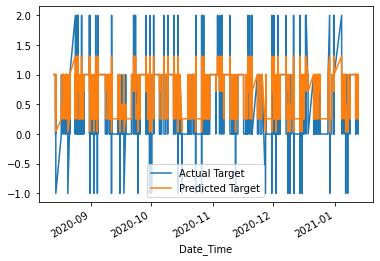

In [71]:
lstm1(new_df, epochs_num= 1, num_feature_cols=2)